# 1. Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# 讀取CSV檔案
data = pd.read_csv('datanew.csv', index_col=0)

# 從 data_new.csv 選取Crossing ~ GKReflexes欄位（共34個屬性）
df = data.loc[:,'Crossing':'GKReflexes']

# 計算以上所有欄位的平均
array_data = np.array(df)
column_data_mean = np.mean(array_data, axis =0)
all_data_mean = np.mean(column_data_mean)

# 加標籤（大於平均：’ Above-average Players’, 小於平均：’ Below-average Players’）
df['all_mean'] = df[:].mean(axis=1)
df.loc[df.all_mean > all_data_mean, 'label']  = 'Above-average Players'
df.loc[df.all_mean <= all_data_mean, 'label'] = 'Below-average Players'
df.drop('all_mean', axis=1, inplace=True)

data['label'] = df['label']

feature = df.iloc[:,0:34]

#將屬性轉為數字label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
target = le.fit_transform(data['label'])

# 切分訓練與測試資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.33, random_state=1)

# 定義 target_name 用於顯示圖表使用
target_names = ['Above-average Players', 'Below-average Players']

訓練集準確度為： 0.9118855827716588
測試集準確度為： 0.9127315201067913

classification_report:
                        precision    recall  f1-score   support

Above-average Players       0.89      0.97      0.93      3397
Below-average Players       0.95      0.84      0.89      2596

             accuracy                           0.91      5993
            macro avg       0.92      0.90      0.91      5993
         weighted avg       0.92      0.91      0.91      5993



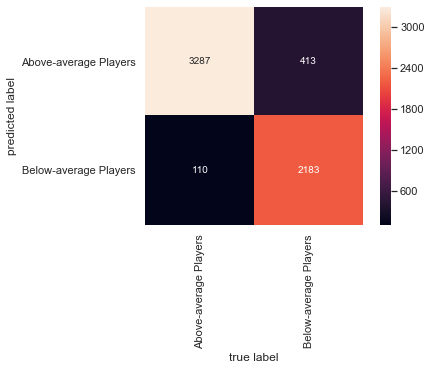

In [3]:
from sklearn.naive_bayes import GaussianNB

# 建立 Naive Bayes 模型
nb = GaussianNB()

# 僅挑選 Crossing ~ SlidingTackle 的屬性
feature = data.loc[:,'Crossing':'SlidingTackle']
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.33, random_state=1)

datanew_nb = nb.fit(X_train, y_train)

# 預測
y_test_pred = datanew_nb.predict(X_test)
y_train_pred = datanew_nb.predict(X_train)
# 績效
test_accuracy = accuracy_score(y_test ,y_test_pred)
train_accuracy = accuracy_score(y_train ,y_train_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('訓練集準確度為：', train_accuracy)
print('測試集準確度為：', test_accuracy)
print('\nclassification_report:\n', classification_report(y_test, y_test_pred, target_names=target_names))

mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
